In [2]:
import numpy as np
from PIL import Image
import pywt
import cv2

In [5]:
src = 'stock.png'

img = Image.open(src, 'r')
width, height = img.size
array = np.array(list(img.getdata()))

print(array)

if img.mode == 'RGB':
    n = 3
elif img.mode == 'RGBA':
    n = 4
total_pixels = array.size//n

print (total_pixels)

message = "This is a secret message"
message += "$t3g0"
b_message = ''.join([format(ord(i), "08b") for i in message])

print(b_message)

[[169 152 132]
 [167 150 130]
 [166 150 127]
 ...
 [110  92  72]
 [102  81  62]
 [ 97  76  57]]
1184000
0101010001101000011010010111001100100000011010010111001100100000011000010010000001110011011001010110001101110010011001010111010000100000011011010110010101110011011100110110000101100111011001010010010001110100001100110110011100110000


In [ ]:
def Encode(src, message, dest):

    img = Image.open(src, 'r')
    width, height = img.size
    array = np.array(list(img.getdata()))

    if img.mode == 'RGB':
        n = 3
    elif img.mode == 'RGBA':
        n = 4
    total_pixels = array.size//n

    message += "$t3g0"
    b_message = ''.join([format(ord(i), "08b") for i in message])
    req_pixels = len(b_message)

    if req_pixels > total_pixels:
        print("ERROR: Need larger file size")

    else:
        index=0
        for p in range(total_pixels):
            for q in range(0, 3):
                if index < req_pixels:
                    array[p][q] = int(bin(array[p][q])[2:9] + b_message[index], 2)
                    index += 1

        array=array.reshape(height, width, n)
        enc_img = Image.fromarray(array.astype('uint8'), img.mode)
        enc_img.save(dest)
        print("Image Encoded Successfully")

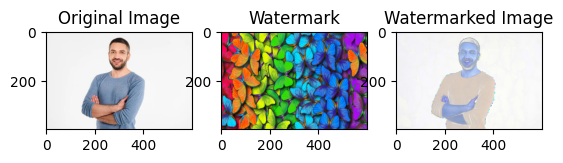

Watermarked successfully


In [9]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Read the host image
host = cv2.imread('person.jpeg')
m, n, p = host.shape

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(host, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Perform DWT on the host image using Haar wavelet
coeffs_host = pywt.dwt2(host, 'haar')
host_LL, (host_LH, host_HL, host_HH) = coeffs_host

# Read and resize the watermark image
water_mark = cv2.imread('colors.png')
water_mark = cv2.resize(water_mark, (n, m))

# Display watermark image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(water_mark, cv2.COLOR_BGR2RGB))
plt.title('Watermark')

# Perform DWT on the watermark image using Haar wavelet
coeffs_water_mark = pywt.dwt2(water_mark, 'haar')
water_mark_LL, (water_mark_LH, water_mark_HL, water_mark_HH) = coeffs_water_mark

# Watermark the host image
watermarked_LL = host_LL + (0.03 * water_mark_LL)
watermarked = pywt.idwt2((watermarked_LL, (host_LH, host_HL, host_HH)), 'haar')

# Display watermarked image
plt.subplot(1, 3, 3)
plt.imshow(np.uint8(watermarked))
plt.title('Watermarked Image')

# Save the watermarked image
cv2.imwrite('Watermarked.png', cv2.cvtColor(np.uint8(watermarked), cv2.COLOR_RGB2BGR))

# Show the plots
plt.show()

y = 'Watermarked successfully'
print(y)